In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image as pil_img

In [2]:
# Importer la base de données d'images
# Il s'agit ici d'un répertoire local
import pathlib
data_dir = pathlib.Path("baseDeDonnees/")

# Nombre d'images "jpg" dans la base d'images
image_count = len(list(data_dir.glob('*/*.jpg')))
print("Nombre d'images 'JPEG' :", image_count)

Nombre d'images 'JPEG' : 2003


In [3]:
# Visualiser quelques fleurs de la base de données
roses = list(data_dir.glob('roses/*'))
tulips = list(data_dir.glob('tulips/*'))

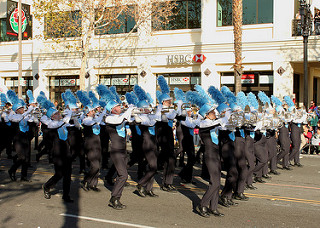

In [4]:
pil_img.open(str(roses[10]))

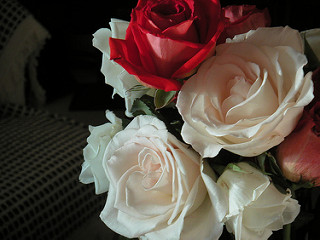

In [5]:
pil_img.open(str(roses[1]))

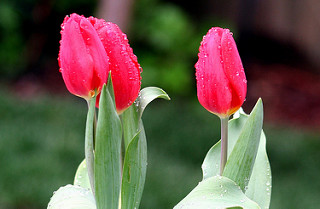

In [6]:
pil_img.open(str(tulips[0]))

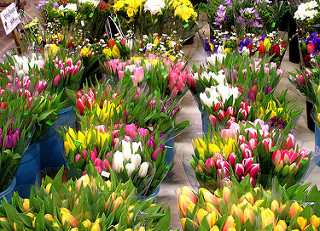

In [7]:
pil_img.open(str(tulips[1]))

In [8]:
batch_size = 16
img_height = 180
img_width = 180

In [9]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

# Création d'un modèle séquentiel
num_classes = 5

model = Sequential([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])


In [10]:
# Compilation du modèle
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [11]:
from tensorflow import keras
# Préparation des données d'apprentissage
train_ds = keras.preprocessing.image_dataset_from_directory(data_dir,
                                                               validation_split=0.2,
                                                               subset="training",
                                                               seed=123,
                                                               image_size=(img_height, img_width),
                                                               batch_size=batch_size)

# Préparation des données de validation
val_ds = keras.preprocessing.image_dataset_from_directory(data_dir,
                                                          validation_split=0.2,
                                                          subset="validation",
                                                          seed=123,
                                                          image_size=(img_height, img_width),
                                                          batch_size=batch_size)

Found 2003 files belonging to 5 classes.
Using 1603 files for training.
Found 2003 files belonging to 5 classes.
Using 400 files for validation.


Différentes classes : ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


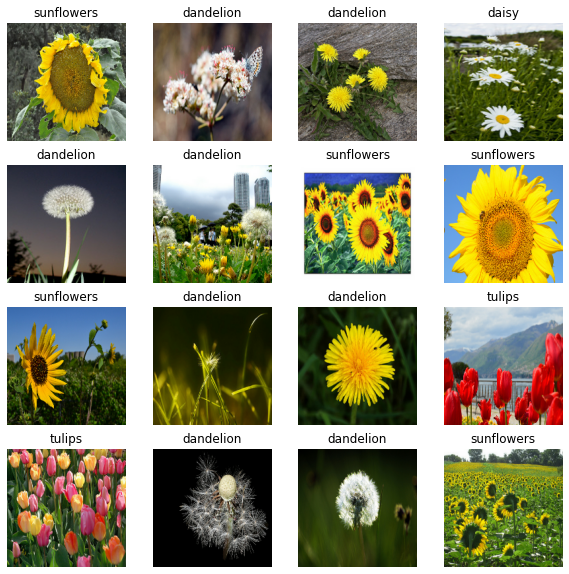

In [12]:
# Afficher quelques données
import matplotlib.pyplot as plt

class_names = train_ds.class_names
print("Différentes classes :", class_names)

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(0, 16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [13]:
image_batch, labels_batch = next(iter(train_ds))
first_image = image_batch[0]
print("Valeurs des pixels avant normalisation", np.min(first_image), np.max(first_image))

# Création d'une couche de normalisation pour normaliser les valeurs de pixels entre 0 et 1
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]


# Les valeurs de pixels sont désormais compris entre 0 et 1 au lieu de 0 et 255
print("Valeurs des pixels après normalisation", np.min(first_image), np.max(first_image))


Valeurs des pixels avant normalisation 0.0 255.0
Valeurs des pixels après normalisation 0.0 1.0


In [14]:
# Entrainement du modèle
epochs=10
history = model.fit(train_ds, 
                    validation_data=val_ds,
                    epochs=epochs)

Epoch 1/10
101/101 [==============================] - 54s 526ms/step - loss: 1.5134 - accuracy: 0.3431 - val_loss: 1.2597 - val_accuracy: 0.4625
Epoch 2/10
101/101 [==============================] - 50s 496ms/step - loss: 1.0798 - accuracy: 0.5558 - val_loss: 0.9801 - val_accuracy: 0.6075
Epoch 3/10
101/101 [==============================] - 51s 500ms/step - loss: 0.8417 - accuracy: 0.6756 - val_loss: 0.9095 - val_accuracy: 0.6500
Epoch 4/10
101/101 [==============================] - 51s 501ms/step - loss: 0.5527 - accuracy: 0.7960 - val_loss: 1.0182 - val_accuracy: 0.6400
Epoch 5/10
101/101 [==============================] - 50s 498ms/step - loss: 0.3449 - accuracy: 0.8871 - val_loss: 1.2682 - val_accuracy: 0.6300
Epoch 6/10
101/101 [==============================] - 52s 510ms/step - loss: 0.1591 - accuracy: 0.9595 - val_loss: 1.7187 - val_accuracy: 0.6125
Epoch 7/10
101/101 [==============================] - 56s 556ms/step - loss: 0.0998 - accuracy: 0.9713 - val_loss: 1.7088 - val_ac

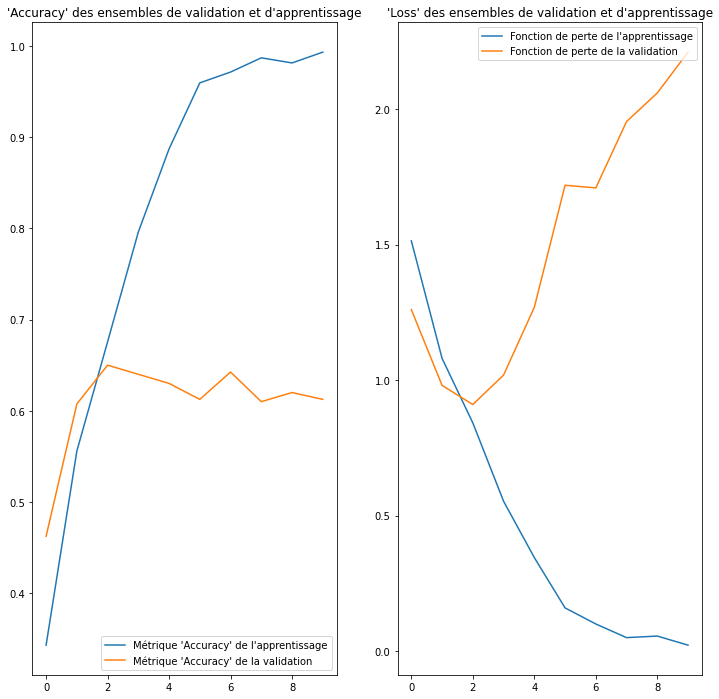

In [15]:
# Visualisation des métriques de la phase d'appentissage
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 12))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label="Métrique 'Accuracy' de l'apprentissage")
plt.plot(epochs_range, val_acc, label="Métrique 'Accuracy' de la validation")
plt.legend(loc='lower right')
plt.title("'Accuracy' des ensembles de validation et d'apprentissage")

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label="Fonction de perte de l'apprentissage")
plt.plot(epochs_range, val_loss, label="Fonction de perte de la validation")
plt.legend(loc='upper right')
plt.title("'Loss' des ensembles de validation et d'apprentissage")
plt.show()


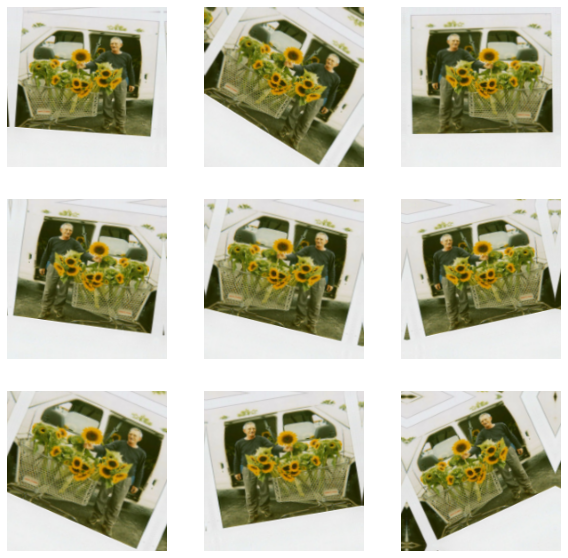

In [16]:
# Augmentation de données pour améliorer la qualité de l'apprentissage
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, img_width, 3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[5].numpy().astype("uint8"))
    plt.axis("off")


In [17]:
# Utilisation du dropout pour réduire le sur-apprentissage
new_model = Sequential([data_augmentation,
                    layers.experimental.preprocessing.Rescaling(1./255),
                    layers.Conv2D(16, 3, padding='same', activation='relu'),
                    layers.MaxPooling2D(),
                    layers.Conv2D(32, 3, padding='same', activation='relu'),
                    layers.MaxPooling2D(),
                    layers.Conv2D(64, 3, padding='same', activation='relu'),
                    layers.MaxPooling2D(),
                    # On rajoute ici une couche de Dropout
                    layers.Dropout(0.2),
                    layers.Flatten(),
                    layers.Dense(128, activation='relu'),
                    layers.Dense(num_classes)])



In [18]:
# Compilation du modèle
new_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [19]:
# Nouvel entrainement du modèle
epochs=15
history = new_model.fit(train_ds, validation_data=val_ds, 
                        epochs=epochs)

Epoch 1/15
101/101 [==============================] - 55s 526ms/step - loss: 1.2982 - accuracy: 0.4361 - val_loss: 1.0817 - val_accuracy: 0.5750
Epoch 2/15
101/101 [==============================] - 53s 527ms/step - loss: 1.0639 - accuracy: 0.5758 - val_loss: 1.1668 - val_accuracy: 0.5325
Epoch 3/15
101/101 [==============================] - 66s 647ms/step - loss: 0.9780 - accuracy: 0.6157 - val_loss: 0.9525 - val_accuracy: 0.6350
Epoch 4/15
101/101 [==============================] - 52s 510ms/step - loss: 0.9257 - accuracy: 0.6376 - val_loss: 0.9793 - val_accuracy: 0.6300
Epoch 5/15
101/101 [==============================] - 54s 535ms/step - loss: 0.8815 - accuracy: 0.6594 - val_loss: 0.8157 - val_accuracy: 0.7075
Epoch 6/15
101/101 [==============================] - 49s 486ms/step - loss: 0.7999 - accuracy: 0.6843 - val_loss: 0.9881 - val_accuracy: 0.6300
Epoch 7/15
101/101 [==============================] - 56s 554ms/step - loss: 0.7796 - accuracy: 0.6943 - val_loss: 0.8012 - val_ac

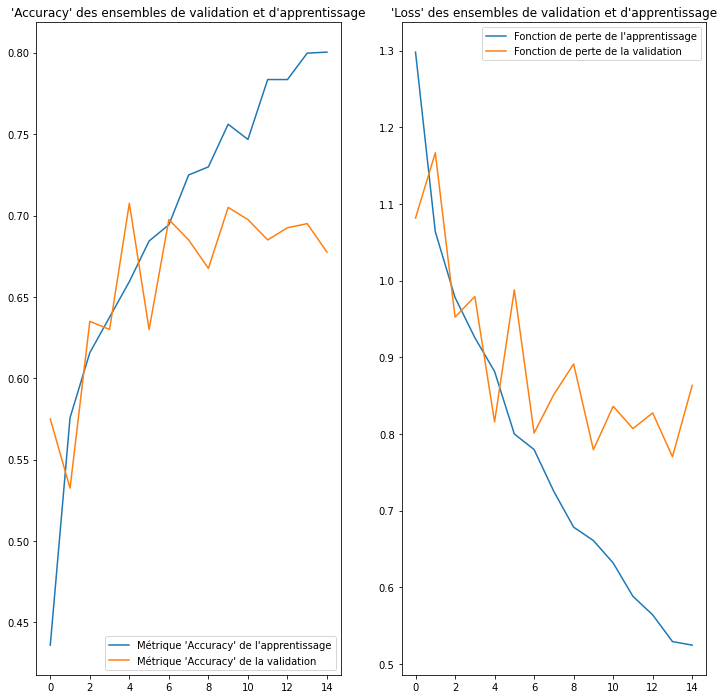

In [20]:
# Visualisation des métriques de la phase d'appentissage
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 12))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label="Métrique 'Accuracy' de l'apprentissage")
plt.plot(epochs_range, val_acc, label="Métrique 'Accuracy' de la validation")
plt.legend(loc='lower right')
plt.title("'Accuracy' des ensembles de validation et d'apprentissage")

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label="Fonction de perte de l'apprentissage")
plt.plot(epochs_range, val_loss, label="Fonction de perte de la validation")
plt.legend(loc='upper right')
plt.title("'Loss' des ensembles de validation et d'apprentissage")
plt.show()